In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 
sns.set_style("darkgrid", {"grid.color": ".6", 
                           "grid.linestyle": ":"})

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV

Load Data


In [3]:
# read dataset using pndas function
# use parse_dates argument to change datetime dtype
df = pd.read_csv("laptop_prices.csv")
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [84]:
# Assuming 'df' is your DataFrame and you want to describe the 'Price_euros' column
column_name = 'Price_euros'

# Get the summary statistics of the specified column
description = df[column_name].describe()

# Print the summary statistics
print(description)


count    1275.000000
mean     1134.969059
std       700.752504
min       174.000000
25%       609.000000
50%       989.000000
75%      1496.500000
max      6099.000000
Name: Price_euros, dtype: float64


In [5]:
# Calculate maximum and minimum values
max_value = df['Price_euros'].max()
min_value = df['Price_euros'].min()


# Print results
print("Maximum value in Price column:", max_value)
print("Minimum value in Price column:", min_value)


Maximum value in Price column: 6099.0
Minimum value in Price column: 174.0


In [6]:
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicates = df.duplicated().sum()

# Print the results
print("Missing Values in each column:")
print(missing_values)

print("\nNumber of duplicate rows:")
print(duplicates)

Missing Values in each column:
Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

Number of duplicate rows:
0


Identify non-numeric columns and apply frequency encoding

In [30]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Apply frequency encoding to each non-numeric column
for col in non_numeric_columns:
    frequency = df[col].value_counts()
    df[col] = df[col].map(frequency)

# Show the resulting dataframe with frequency encoding applied
df.head()

,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,...,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,21,194,13.3,8,13,1.37,1339.69,369,2560,1600,...,357,17,1214,2.3,128,0,837,1067,704,8
1,21,194,13.3,8,13,1.34,898.94,369,1440,900,...,918,1258,1214,1.8,128,0,71,1067,704,5
2,268,707,15.6,8,66,1.86,575.00,835,1920,1080,...,918,1258,1214,2.5,256,0,837,1067,704,279
3,21,194,15.4,16,13,1.83,2537.45,369,2880,1800,...,357,17,1214,2.7,512,0,837,1067,174,1
4,21,194,13.3,8,13,1.37,1803.60,369,2560,1600,...,357,17,1214,3.1,256,0,837,1067,704,2


In [31]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces


Compute correlation matrix

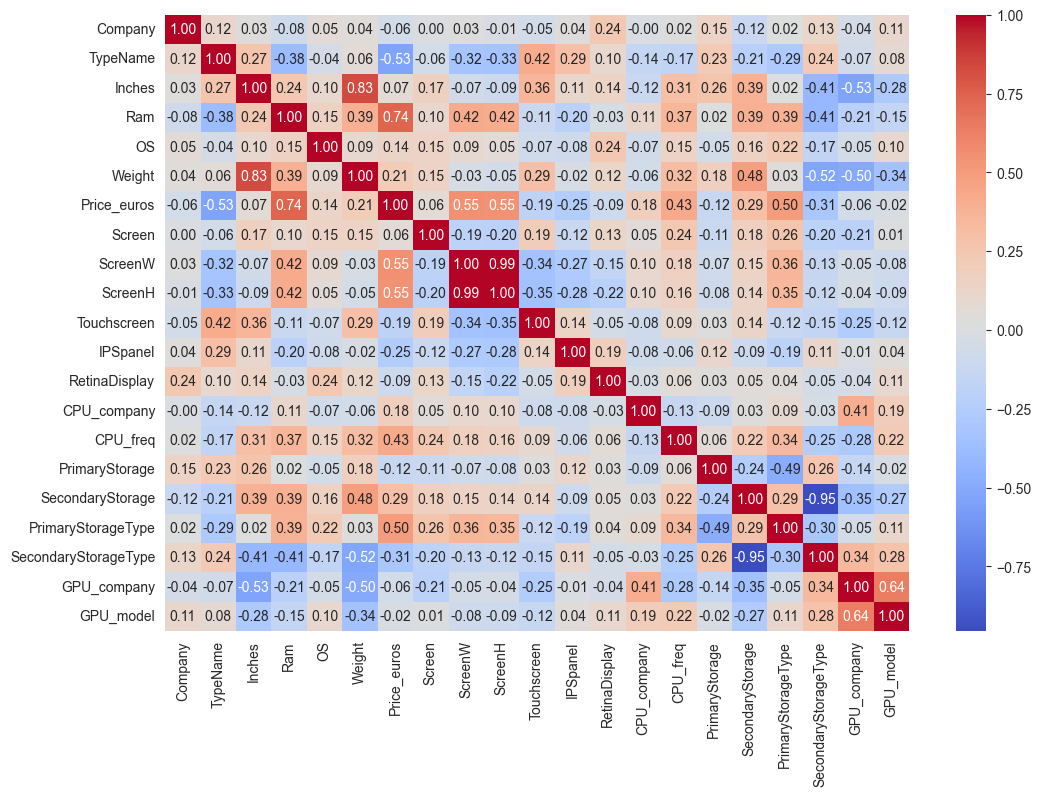

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


The correlation matrix reveals the relationships between numerical features. <br>Based on this and domain considerations, the following features are identified for removal:<br>
Product: Too specific to individual models, unlikely to generalize.<br>
GPU_model: Can be replaced with broader GPU_company.<br>
CPU_model: Can be replaced with broader CPU_company.<br>
Screen: Redundant since ScreenW and ScreenH provide similar information.<br>

In [35]:
df.drop(columns=['Product', 'GPU_model', 'CPU_model'], errors='ignore')

,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,21,194,13.3,8,13,1.37,1339.69,369,2560,1600,1087,357,17,1214,2.3,128,0,837,1067,704
1,21,194,13.3,8,13,1.34,898.94,369,1440,900,1087,918,1258,1214,1.8,128,0,71,1067,704
2,268,707,15.6,8,66,1.86,575.00,835,1920,1080,1087,918,1258,1214,2.5,256,0,837,1067,704
3,21,194,15.4,16,13,1.83,2537.45,369,2880,1800,1087,357,17,1214,2.7,512,0,837,1067,174
4,21,194,13.3,8,13,1.37,1803.60,369,2560,1600,1087,357,17,1214,3.1,256,0,837,1067,704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,289,117,14.0,4,1048,1.80,638.00,835,1920,1080,188,357,1258,1214,2.5,128,0,837,1067,704
1271,289,117,13.3,16,1048,1.30,1499.00,28,3200,1800,188,357,1258,1214,2.5,512,0,837,1067,704
1272,289,707,14.0,2,1048,1.50,229.00,369,1366,768,1087,918,1258,1214,1.6,64,0,71,1067,704
1273,268,707,15.6,6,1048,2.19,764.00,369,1366,768,1087,918,1258,1214,2.5,1024,0,359,1067,174


To increase the speed of calculations,sort the price feature in ascending order:



In [36]:
# Sort the DataFrame by 'Price_euros' in ascending order
df = df.sort_values(by='Price_euros').reset_index(drop=True)

# Display the first few rows to check the result
print(df.head())


   Company  TypeName  Inches  Ram    OS  Weight  Price_euros  Screen  ScreenW  \
0      101        23    11.6    2    27    1.30        174.0     369     1366   
1      152        23    11.6    2  1048    0.98        191.9     369     1366   
2        4       707    13.3    4  1048    1.35        196.0     835     1920   
3      152       707    14.0    2  1048    1.65        199.0     369     1366   
4      101       707    15.6    2    27    2.19        199.0     369     1366   

   ScreenH  ...  IPSpanel  RetinaDisplay  CPU_company  CPU_freq  \
0      768  ...       918           1258         1214      1.50   
1      768  ...       918           1258         1214      1.44   
2     1080  ...       918           1258         1214      1.44   
3      768  ...       918           1258           60      1.50   
4      768  ...       918           1258         1214      1.50   

   PrimaryStorage  SecondaryStorage  PrimaryStorageType  SecondaryStorageType  \
0              32            

To remove the comma (",") from the entire dataset and convert numerical columns to float



In [37]:
# Remove commas from all columns
df.replace(',', '', regex=True, inplace=True)

# Convert relevant columns to float (all columns except the ones that are not numeric)
df = df.apply(pd.to_numeric, errors='ignore')

# Display the first few rows to check the result
print(df.head())


   Company  TypeName  Inches  Ram    OS  Weight  Price_euros  Screen  ScreenW  \
0      101        23    11.6    2    27    1.30        174.0     369     1366   
1      152        23    11.6    2  1048    0.98        191.9     369     1366   
2        4       707    13.3    4  1048    1.35        196.0     835     1920   
3      152       707    14.0    2  1048    1.65        199.0     369     1366   
4      101       707    15.6    2    27    2.19        199.0     369     1366   

   ScreenH  ...  IPSpanel  RetinaDisplay  CPU_company  CPU_freq  \
0      768  ...       918           1258         1214      1.50   
1      768  ...       918           1258         1214      1.44   
2     1080  ...       918           1258         1214      1.44   
3      768  ...       918           1258           60      1.50   
4      768  ...       918           1258         1214      1.50   

   PrimaryStorage  SecondaryStorage  PrimaryStorageType  SecondaryStorageType  \
0              32            

In [49]:
# Reload the data if needed to restore the original 'Company' column
df = pd.read_csv("laptop_prices.csv")

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Calculate the frequency of each company
frequency_mapping = df['Company'].value_counts()

# Create a DataFrame to display the mapping
company_frequency_df = pd.DataFrame({
    'Company': frequency_mapping.index,   # Original company names
    'Frequency': frequency_mapping.values # Frequency counts
})

# Reset the index for a cleaner look
company_frequency_df.reset_index(drop=True, inplace=True)

# Display the mapping
print(company_frequency_df)

# Optionally save the mapping for later
# company_frequency_df.to_csv("company_frequency_mapping.csv", index=False)


      Company  Frequency
0        Dell        291
1      Lenovo        289
2          HP        268
3        Asus        152
4        Acer        101
5         MSI         54
6     Toshiba         48
7       Apple         21
8     Samsung          9
9    Mediacom          7
10      Razer          7
11  Microsoft          6
12       Vero          4
13     Xiaomi          4
14      Chuwi          3
15    Fujitsu          3
16     Google          3
17         LG          3
18     Huawei          2


Display the freequency encode mapping

A line plot is ideal to observe the trend of prices with product company.



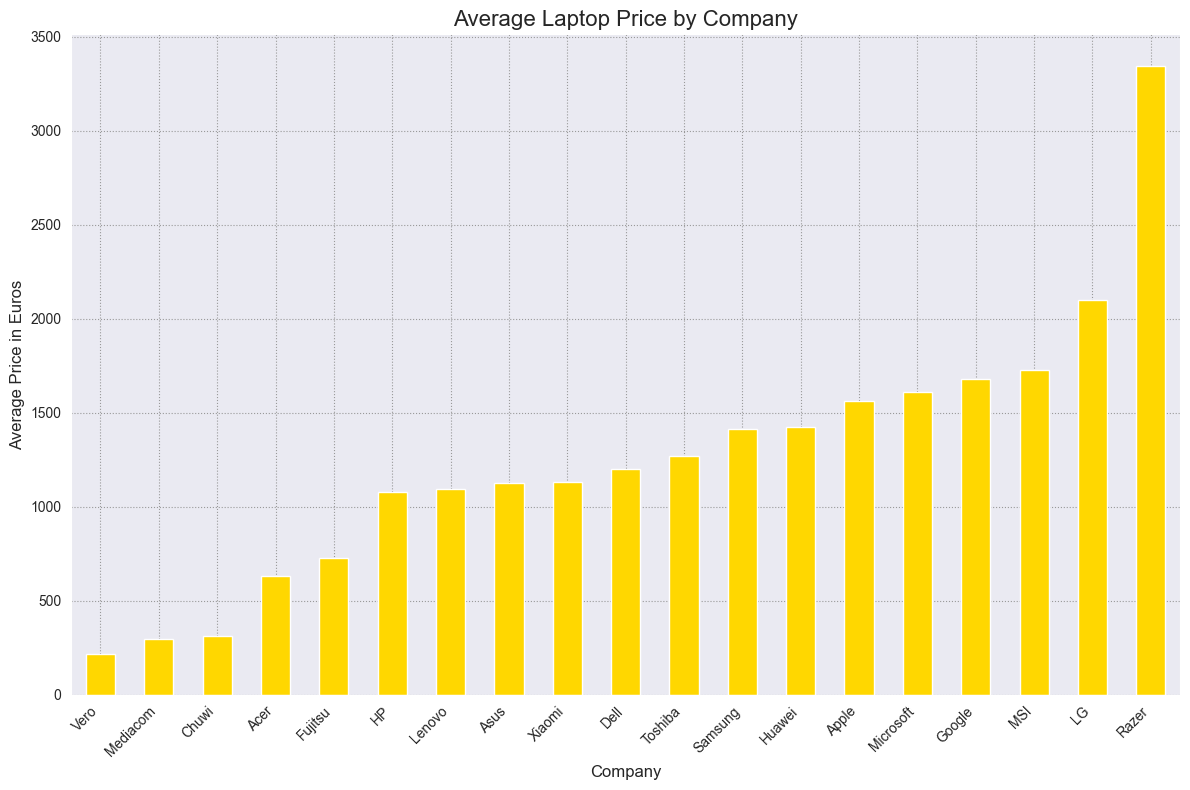

In [50]:
# Save the original 'Company' column
original_company_names = df['Company'].copy()

# Apply frequency encoding to non-numeric columns (as done earlier)
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
for col in non_numeric_columns:
    frequency = df[col].value_counts()
    df[col] = df[col].map(frequency)

# Use the original company names for plotting
df['Original_Company'] = original_company_names

# Group by the original company names
company_price = df.groupby('Original_Company')['Price_euros'].mean().sort_values()

# Plot the data
plt.figure(figsize=(12, 8))  # Increase the figure size
company_price.plot(kind='bar', color='gold')

plt.title('Average Laptop Price by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Price in Euros', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotate the labels and adjust the alignment

plt.grid(True)
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()


Spliting data sets

In [64]:
# Assuming df is your DataFrame and it has 2583 rows
total_data_points = len(df)

# Calculate the split index (80% for training, 20% for testing)
split_index = int(total_data_points * 0.8)

# Split the data into training and testing sets
train_data = df[:split_index]
test_data = df[split_index:]

# Check the sizes of the training and testing sets
print(f"Training set size: {train_data.shape[0]}")
print(f"Test set size: {test_data.shape[0]}")
train_data

Training set size: 1020
Test set size: 255


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Original_Company
0,21,10,194,13.3,8,13,1.37,1339.69,369,2560,...,1214,2.3,12,128,0,837,1067,704,8,Apple
1,21,2,194,13.3,8,13,1.34,898.94,369,1440,...,1214,1.8,12,128,0,71,1067,704,5,Apple
2,268,21,707,15.6,8,66,1.86,575.00,835,1920,...,1214,2.5,193,256,0,837,1067,704,279,HP
3,21,10,194,15.4,16,13,1.83,2537.45,369,2880,...,1214,2.7,4,512,0,837,1067,174,1,Apple
4,21,10,194,13.3,8,13,1.37,1803.60,369,2560,...,1214,3.1,12,256,0,837,1067,704,2,Apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,48,1,707,13.3,8,1048,1.50,1210.00,369,1366,...,1214,2.3,68,256,0,837,1067,704,181,Toshiba
1016,268,18,707,15.6,4,1048,2.04,769.99,369,1366,...,1214,2.4,35,256,0,837,1067,704,279,HP
1017,289,1,707,17.3,16,45,2.40,2968.00,43,3840,...,1214,2.7,7,512,0,837,1067,396,1,Lenovo
1018,48,1,707,14.0,8,1048,1.47,1490.00,835,1920,...,1214,2.3,68,256,0,837,1067,704,181,Toshiba


In [56]:
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Original_Company
0,21,10,194,13.3,8,13,1.37,1339.69,369,2560,...,1214,2.3,12,128,0,837,1067,704,8,Apple
1,21,2,194,13.3,8,13,1.34,898.94,369,1440,...,1214,1.8,12,128,0,71,1067,704,5,Apple
2,268,21,707,15.6,8,66,1.86,575.00,835,1920,...,1214,2.5,193,256,0,837,1067,704,279,HP
3,21,10,194,15.4,16,13,1.83,2537.45,369,2880,...,1214,2.7,4,512,0,837,1067,174,1,Apple
4,21,10,194,13.3,8,13,1.37,1803.60,369,2560,...,1214,3.1,12,256,0,837,1067,704,2,Apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,289,1,117,14.0,4,1048,1.80,638.00,835,1920,...,1214,2.5,43,128,0,837,1067,704,181,Lenovo
1271,289,3,117,13.3,16,1048,1.30,1499.00,28,3200,...,1214,2.5,43,512,0,837,1067,704,181,Lenovo
1272,289,3,707,14.0,2,1048,1.50,229.00,369,1366,...,1214,1.6,5,64,0,71,1067,704,23,Lenovo
1273,268,1,707,15.6,6,1048,2.19,764.00,369,1366,...,1214,2.5,43,1024,0,359,1067,174,5,HP


Feature and target value

In [65]:

from sklearn.preprocessing import MinMaxScaler

# Define features and target variable
X_train = train_data[['Company','TypeName', 'Inches','Ram','OS','Weight','Price_euros','Screen','ScreenW','Touchscreen','IPSpanel','RetinaDisplay','CPU_company','CPU_freq','PrimaryStorage','SecondaryStorage','PrimaryStorageType','SecondaryStorageType','GPU_company']]  # Features
y_train = train_data['Price_euros']  # Target variable (Price)



In [66]:

from sklearn.preprocessing import MinMaxScaler

# Define features and target variable
X_test = test_data[['Company','TypeName', 'Inches','Ram','OS','Weight','Price_euros','Screen','ScreenW','Touchscreen','IPSpanel','RetinaDisplay','CPU_company','CPU_freq','PrimaryStorage','SecondaryStorage','PrimaryStorageType','SecondaryStorageType','GPU_company']]  # Features
y_test = test_data['Price_euros']  # Target variable (Price)



In [67]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler 

RandomForestRegressor

In [68]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Apply prediction

In [69]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

Random forest Regressor result

In [70]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)


In [71]:
rf_results = pd.DataFrame([['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]],
                          columns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])

XGBRegressor

In [72]:
xgb = XGBRegressor(max_depth=2, random_state=100)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=100, ...)

Apply prediction

In [73]:
y_xgb_train_pred = xgb.predict(X_train)
y_xgb_test_pred = xgb.predict(X_test)

XGBRegressor result

In [74]:
xgb_train_mse = mean_squared_error(y_train, y_xgb_train_pred)
xgb_train_r2 = r2_score(y_train, y_xgb_train_pred)
xgb_test_mse = mean_squared_error(y_test, y_xgb_test_pred)
xgb_test_r2 = r2_score(y_test, y_xgb_test_pred)

In [75]:
xgb_results = pd.DataFrame([['XGBoost', xgb_train_mse, xgb_train_r2, xgb_test_mse, xgb_test_r2]],
                           columns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])

In [76]:
print("XGBoost Results:")
print(xgb_results)

print("\nRandom Forest Results:")
print(rf_results)

XGBoost Results:
    Method  Training MSE  Training R2     Test MSE   Test R2
0  XGBoost    345.244236     0.999301  3410.874275  0.992847

Random Forest Results:
          Method  Training MSE  Training R2    Test MSE   Test R2
0  Random Forest     131.89859     0.999733  470.040618  0.999014


Comparing both RMSE, MAE ,MAPE of both Regressor

In [77]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# Calculate RMSE (Root Mean Squared Error)
rmse_rf = sqrt(mean_squared_error(y_test, y_xgb_test_pred))

# Calculate MAE (Mean Absolute Error)
mae_rf = mean_absolute_error(y_test, y_xgb_test_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
mape_rf = mean_absolute_percentage_error(y_test, y_xgb_test_pred)

# Print the results
print(f"RMSE (XGB): {rmse_rf}")
print(f"MAE (XGB): {mae_rf}")
print(f"MAPE (XGB): {mape_rf}")


RMSE (XGB): 58.40269065036345
MAE (XGB): 19.958284998276653
MAPE (XGB): 0.01709677417208948


In [78]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# Calculate RMSE (Root Mean Squared Error)
rmse_rf = sqrt(mean_squared_error(y_test, y_rf_test_pred))

# Calculate MAE (Mean Absolute Error)
mae_rf = mean_absolute_error(y_test, y_rf_test_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
mape_rf = mean_absolute_percentage_error(y_test, y_rf_test_pred)

# Print the results
print(f"RMSE (Random Forest): {rmse_rf}")
print(f"MAE (Random Forest): {mae_rf}")
print(f"MAPE (Random Forest): {mape_rf}")


RMSE (Random Forest): 21.680420153528626
MAE (Random Forest): 3.7058992156862716
MAPE (Random Forest): 0.0031654896789507824


Plot to observe the actual vs predicted price

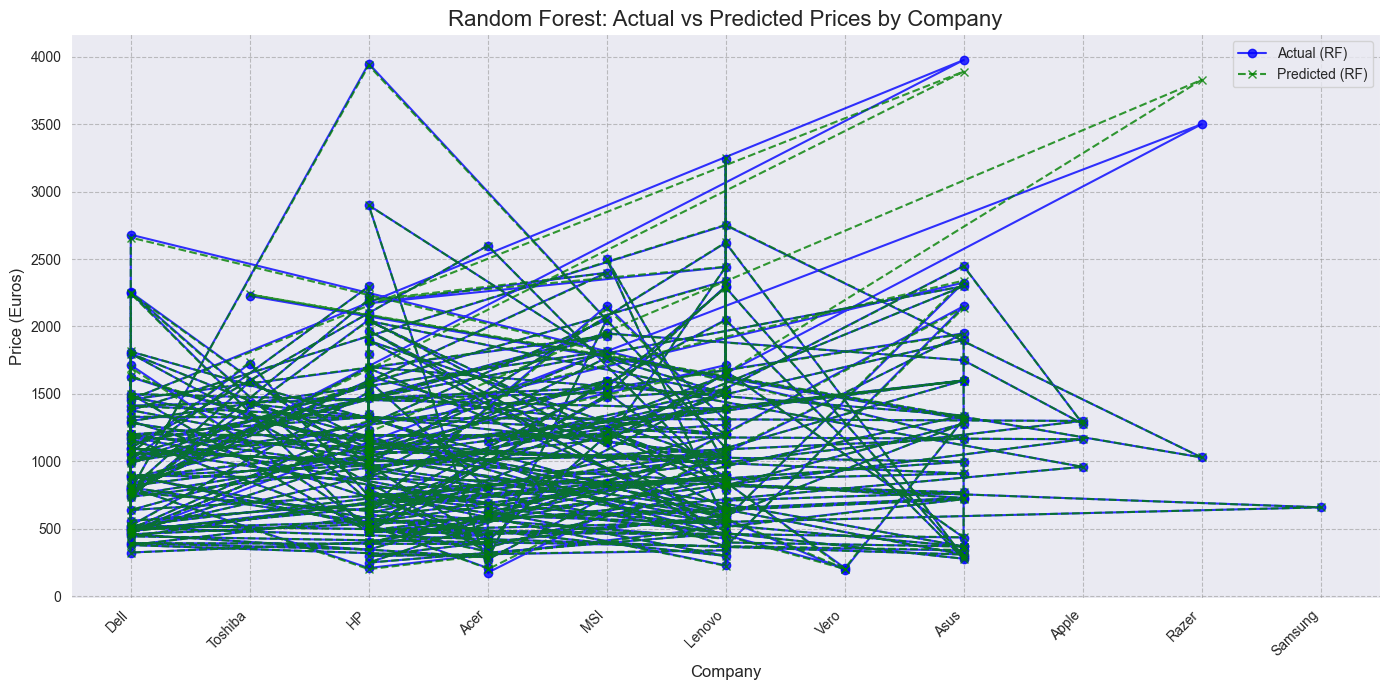

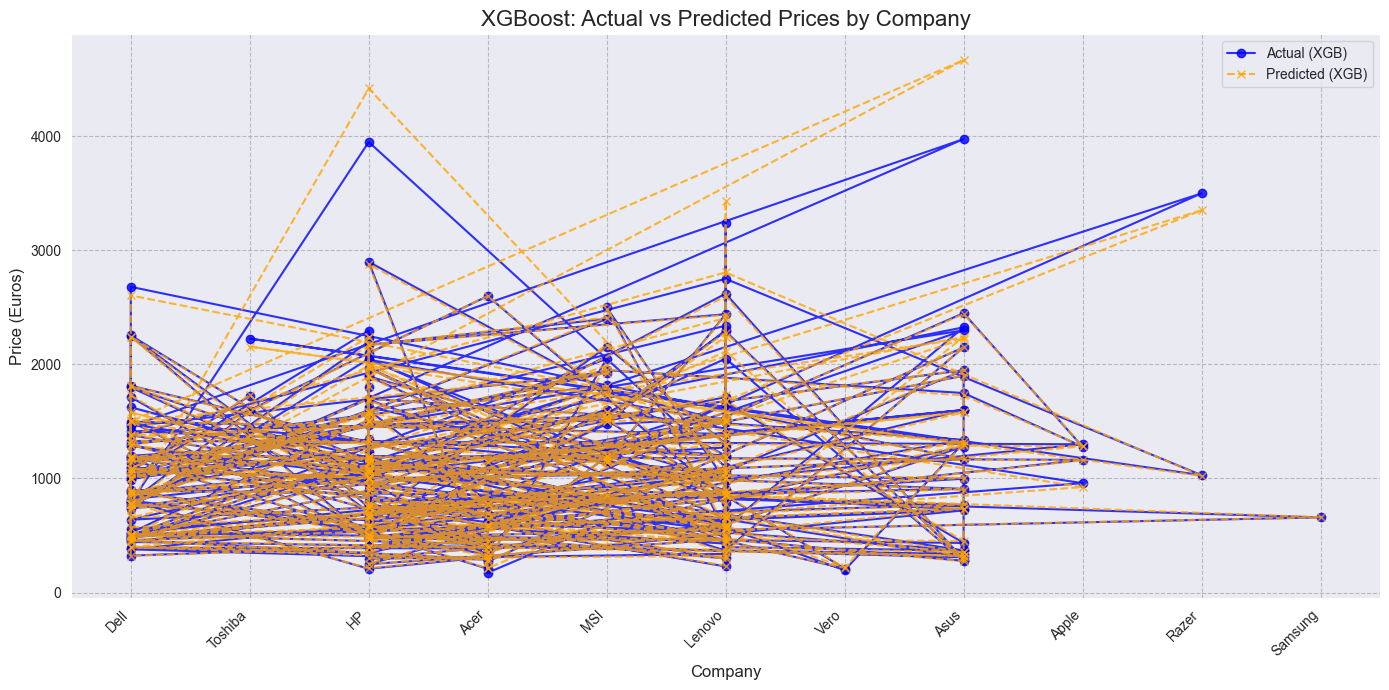

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame based on your company list and test results
results_df = pd.DataFrame({
    'Company': test_data['Original_Company'],  # Original company names from the test dataset
    'Actual': y_test.values,                  # Actual prices
    'Predicted_RF': y_rf_test_pred,           # Predicted prices by Random Forest
    'Predicted_XGB': y_xgb_test_pred          # Predicted prices by XGBoost
})

# Filter results only for the provided company list
company_list = [
    "Dell", "Lenovo", "HP", "Asus", "Acer", "MSI", "Toshiba", "Apple", "Samsung", "Mediacom",
    "Razer", "Microsoft", "Vero", "Xiaomi", "Chuwi", "Fujitsu", "Google", "LG", "Huawei"
]
results_df = results_df[results_df['Company'].isin(company_list)].reset_index(drop=True)

# Plot for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(results_df['Company'], results_df['Actual'], label='Actual (RF)', marker='o', color='blue', linestyle='-', alpha=0.8)
plt.plot(results_df['Company'], results_df['Predicted_RF'], label='Predicted (RF)', marker='x', color='green', linestyle='--', alpha=0.8)
plt.title('Random Forest: Actual vs Predicted Prices by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for XGBoost
plt.figure(figsize=(14, 7))
plt.plot(results_df['Company'], results_df['Actual'], label='Actual (XGB)', marker='o', color='blue', linestyle='-', alpha=0.8)
plt.plot(results_df['Company'], results_df['Predicted_XGB'], label='Predicted (XGB)', marker='x', color='orange', linestyle='--', alpha=0.8)
plt.title('XGBoost: Actual vs Predicted Prices by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Selecting the limited number of samples to observe clearly

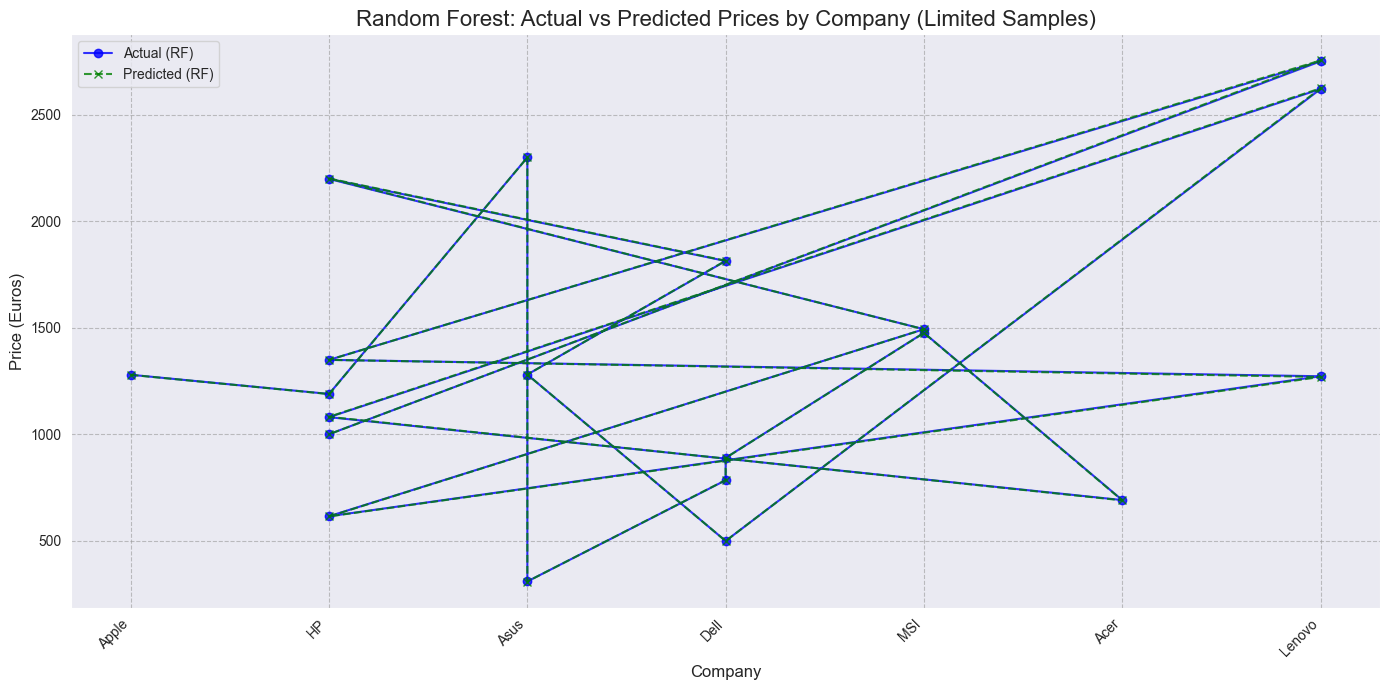

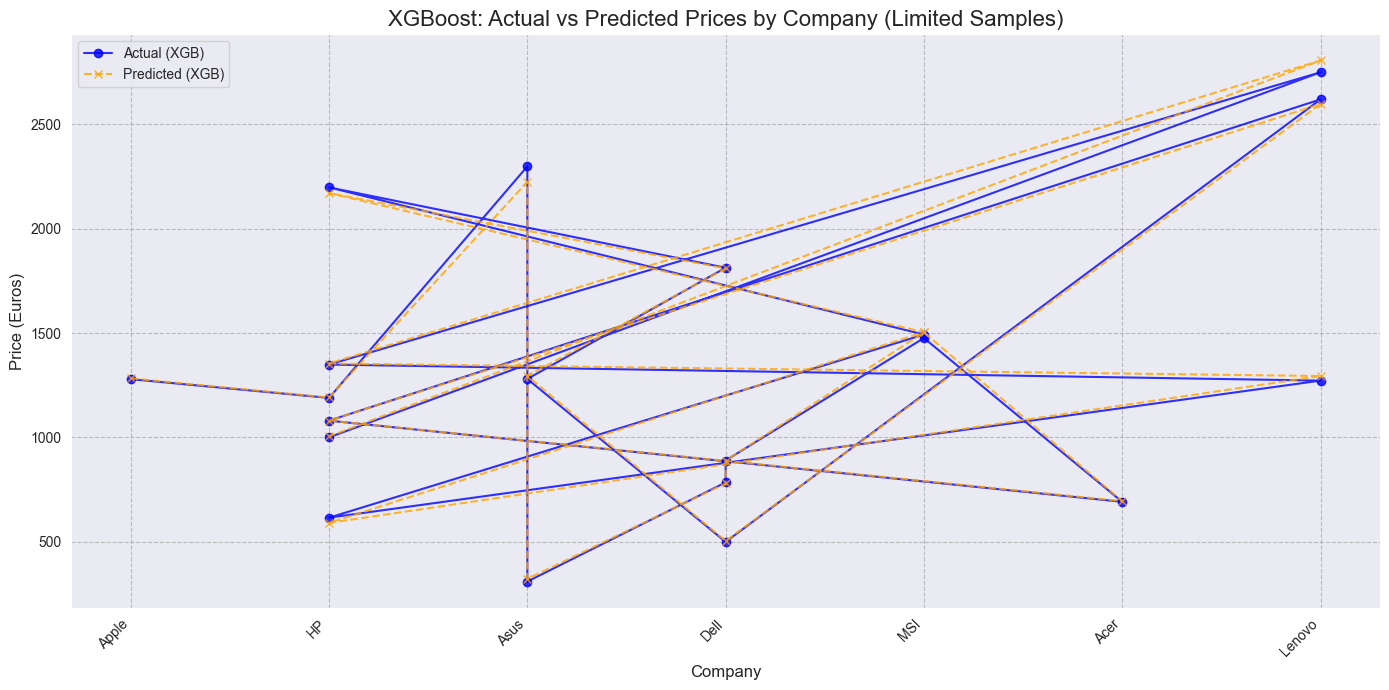

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame based on your company list and test results
results_df = pd.DataFrame({
    'Company': test_data['Original_Company'],  # Original company names from the test dataset
    'Actual': y_test.values,                  # Actual prices
    'Predicted_RF': y_rf_test_pred,           # Predicted prices by Random Forest
    'Predicted_XGB': y_xgb_test_pred          # Predicted prices by XGBoost
})

# Filter results only for the provided company list
company_list = [
    "Dell", "Lenovo", "HP", "Asus", "Acer", "MSI", "Toshiba", "Apple", "Samsung", "Mediacom",
    "Razer", "Microsoft", "Vero", "Xiaomi", "Chuwi", "Fujitsu", "Google", "LG", "Huawei"
]
results_df = results_df[results_df['Company'].isin(company_list)].reset_index(drop=True)

# Select a limited number of samples (e.g., 20 samples)
sampled_results_df = results_df.sample(n=20, random_state=42)  # Random sampling
# Alternatively, for sequential sampling:
# sampled_results_df = results_df.head(20)

# Plot for Random Forest (limited samples)
plt.figure(figsize=(14, 7))
plt.plot(sampled_results_df['Company'], sampled_results_df['Actual'], label='Actual (RF)', marker='o', color='blue', linestyle='-', alpha=0.8)
plt.plot(sampled_results_df['Company'], sampled_results_df['Predicted_RF'], label='Predicted (RF)', marker='x', color='green', linestyle='--', alpha=0.8)
plt.title('Random Forest: Actual vs Predicted Prices by Company (Limited Samples)', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for XGBoost (limited samples)
plt.figure(figsize=(14, 7))
plt.plot(sampled_results_df['Company'], sampled_results_df['Actual'], label='Actual (XGB)', marker='o', color='blue', linestyle='-', alpha=0.8)
plt.plot(sampled_results_df['Company'], sampled_results_df['Predicted_XGB'], label='Predicted (XGB)', marker='x', color='orange', linestyle='--', alpha=0.8)
plt.title('XGBoost: Actual vs Predicted Prices by Company (Limited Samples)', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
